# Data Preprocessing
- Read in data
- Handle missing values
- Create some new variables
- Write new file with updated data

In [56]:
# Import Packages

import numpy as np
import pandas as pd
from pathlib import Path

import datetime

import matplotlib.pyplot as plt
import seaborn as sns

Read in the data and print the first few rows, as well as basic information

In [57]:
 # Read in Data

# set directory
data_dir = 'C:/Users/630125/Desktop/TEDS/Capstone Project'

# read file
df_og = pd.read_csv(str(data_dir)+'/'+ 'SBA_small.csv')

print(df_og.info())
df_og.head()


C:\Users\630125\AppData\Local\Temp\ipykernel_18344\263295373.py:7: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_og = pd.read_csv(str(data_dir)+'/'+ 'SBA_small.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485549 entries, 0 to 485548
Data columns (total 28 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         485549 non-null  int64  
 1   LoanNr_ChkDgt      485549 non-null  int64  
 2   Name               485543 non-null  object 
 3   City               485537 non-null  object 
 4   State              485549 non-null  object 
 5   Zip                485549 non-null  int64  
 6   Bank               484734 non-null  object 
 7   BankState          484732 non-null  object 
 8   NAICS              485549 non-null  int64  
 9   ApprovalDate       485549 non-null  object 
 10  ApprovalFY         485549 non-null  object 
 11  Term               485549 non-null  int64  
 12  NoEmp              485549 non-null  int64  
 13  NewExist           485474 non-null  float64
 14  CreateJob          485549 non-null  int64  
 15  RetainedJob        485549 non-null  int64  
 16  Fr

,Unnamed: 0,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,789326,8386233007,BRENTON'S SALON,NORTH LITTLE ROCK,AK,72116,U.S. BANK NATIONAL ASSOCIATION,AR,0,2-Jun-95,...,N,Y,NaN,31-Jul-95,"$15,000.00",$0.00,P I F,$0.00,"$15,000.00","$12,000.00"
1,186009,2320744003,BARBARA G BACKES MS PA,ROSEVILLE,AK,55113,WELLS FARGO BANK NATL ASSOC,MN,0,14-Sep-98,...,0,N,NaN,31-Oct-98,"$16,000.00",$0.00,P I F,$0.00,"$16,000.00","$12,800.00"
2,542498,5318374004,ASAP CORPORATE SERVICES,IRVINE,AK,92614,UMPQUA BANK,OR,561499,4-Apr-02,...,0,N,NaN,30-Apr-02,"$260,000.00",$0.00,P I F,$0.00,"$260,000.00","$195,000.00"
3,662176,6697524005,BLUEBERRY BABIES,BOSTON,AK,2130,CITIZENS BANK NATL ASSOC,MA,453220,17-Sep-03,...,Y,N,NaN,31-Oct-03,"$5,000.00",$0.00,P I F,$0.00,"$5,000.00","$2,500.00"
4,443503,4306764001,GREEN HILLS PRE-SCHOOL,LOS GATOS,AK,95032,WELLS FARGO BANK NATL ASSOC,SD,624410,14-Feb-01,...,Y,N,NaN,30-Jun-01,"$161,000.00",$0.00,P I F,$0.00,"$100,000.00","$50,000.00"


Some of these columns will not be useful for modeling. For example, `Name` and `City`. And for thsi project, the bank information will be removed as well. We will also remove `ChgOffDate`, `BalanceGross`, and `ChgOffPrinGr`, as these are related to the Default target class and would hinder machine learning model results. Finally, we do not need `Unnamed: 0` and `LoanNr_ChkDgt`, as those are IDs

In [58]:
# Subset Columns

cols_to_keep = ['State',
                'NAICS',
                'ApprovalDate', 'ApprovalFY',
                'Term',
                'NoEmp',
                'NewExist',
                'CreateJob',
                'RetainedJob',
                'FranchiseCode',
                'UrbanRural',
                'RevLineCr',
                'LowDoc',
                'DisbursementDate',
                'DisbursementGross',
                'MIS_Status',
                'GrAppv',
                'SBA_Appv']

df = df_og[cols_to_keep]
print(df.shape)
df.head()

(485549, 18)


,State,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,MIS_Status,GrAppv,SBA_Appv
0,AK,0,2-Jun-95,1995,60,8,2.0,0,0,1,0,N,Y,31-Jul-95,"$15,000.00",P I F,"$15,000.00","$12,000.00"
1,AK,0,14-Sep-98,1998,48,1,1.0,0,0,1,0,0,N,31-Oct-98,"$16,000.00",P I F,"$16,000.00","$12,800.00"
2,AK,561499,4-Apr-02,2002,120,39,1.0,1,39,1,1,0,N,30-Apr-02,"$260,000.00",P I F,"$260,000.00","$195,000.00"
3,AK,453220,17-Sep-03,2003,84,2,1.0,0,2,1,1,Y,N,31-Oct-03,"$5,000.00",P I F,"$5,000.00","$2,500.00"
4,AK,624410,14-Feb-01,2001,60,16,1.0,0,16,1,1,Y,N,30-Jun-01,"$161,000.00",P I F,"$100,000.00","$50,000.00"


There are Null values in the target variable column. We will remove rows with null target values, as they are not helpful for prediction.  
There are other columns with null values to be handled, but that will be addressed further down.

In [59]:
# Handle Null Values in Target Variable
# remove rows where there is a NaN in the target variable column

# check proportion of NaN values in target variable
print("\n{0:.4g}% of the target variable values are null.\n".format(df['MIS_Status'].isnull().sum() / len(df['MIS_Status']) * 100))

# remove rows with NaN value in target variable column
df = df[df['MIS_Status'].notna()].reset_index(drop=True).copy()

# we see now that there are no NaN values in the MIS_Status column
print(df.shape)
print(df.isnull().sum())


0.2257% of the target variable values are null.

(484453, 18)
State                   0
NAICS                   0
ApprovalDate            0
ApprovalFY              0
Term                    0
NoEmp                   0
NewExist               74
CreateJob               0
RetainedJob             0
FranchiseCode           0
UrbanRural              0
RevLineCr            2416
LowDoc               1347
DisbursementDate     1190
DisbursementGross       0
MIS_Status              0
GrAppv                  0
SBA_Appv                0
dtype: int64


Now, recode the target variables in `MIS_Status`. Since we are trying to predict if a loan will fail, a default will be True, and paid-in-full will be False.

In [60]:
# Recode target variable `MIS_Status`

# rename column to `default` for clarity
df.rename(columns = {'MIS_Status':'Default'}, inplace = True)

# recode the variable so paid in full (P I P) is False and charged off (CHGOFF) is True
df['Default'] = np.where(df['Default'] == "CHGOFF", True, False)
df.head(15)

,State,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,Default,GrAppv,SBA_Appv
0,AK,0,2-Jun-95,1995,60,8,2.0,0,0,1,0,N,Y,31-Jul-95,"$15,000.00",False,"$15,000.00","$12,000.00"
1,AK,0,14-Sep-98,1998,48,1,1.0,0,0,1,0,0,N,31-Oct-98,"$16,000.00",False,"$16,000.00","$12,800.00"
2,AK,561499,4-Apr-02,2002,120,39,1.0,1,39,1,1,0,N,30-Apr-02,"$260,000.00",False,"$260,000.00","$195,000.00"
3,AK,453220,17-Sep-03,2003,84,2,1.0,0,2,1,1,Y,N,31-Oct-03,"$5,000.00",False,"$5,000.00","$2,500.00"
4,AK,624410,14-Feb-01,2001,60,16,1.0,0,16,1,1,Y,N,30-Jun-01,"$161,000.00",False,"$100,000.00","$50,000.00"
5,AK,514199,8-Apr-04,2004,84,1,1.0,2,1,1,0,0,N,30-Apr-04,"$5,000.00",False,"$5,000.00","$4,250.00"
6,AK,233320,23-Dec-98,1999,60,5,1.0,0,0,1,0,T,N,30-Nov-00,"$246,370.00",True,"$200,000.00","$150,000.00"
7,AK,422710,26-Mar-01,2001,120,10,1.0,3,13,1,1,0,N,31-May-01,"$49,500.00",False,"$49,500.00","$24,750.00"
8,AK,237130,15-Jun-05,2005,84,15,1.0,0,15,1,2,N,N,31-Jul-05,"$100,000.00",False,"$100,000.00","$50,000.00"
9,AK,541110,20-Apr-07,2007,12,1,2.0,0,1,1,2,Y,N,30-Apr-07,"$10,000.00",False,"$10,000.00","$5,000.00"


Next, reformat the NAICS variable. The first two digits of the code represent the general industry that the small business is in, so only retain the first two digits. A value of zero means undefined, so it will be changed to a NaN value for clarification.

In [61]:
# Reformat NAICS variable

# retain only the first two digits of each code
naics = df['NAICS'].astype(str)
naics_sliced = []

for i in range(len(df['NAICS'])):
    num = df['NAICS'][i]
    naics_sliced.append(int(str(num)[:2]))

df['NAICS'] = naics_sliced
df['NAICS'] = df['NAICS'].replace(0, np.NaN) # set 0 to NaN, as that is an undefined industry
df.head()

,State,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,Default,GrAppv,SBA_Appv
0,AK,NaN,2-Jun-95,1995,60,8,2.0,0,0,1,0,N,Y,31-Jul-95,"$15,000.00",False,"$15,000.00","$12,000.00"
1,AK,NaN,14-Sep-98,1998,48,1,1.0,0,0,1,0,0,N,31-Oct-98,"$16,000.00",False,"$16,000.00","$12,800.00"
2,AK,56.0,4-Apr-02,2002,120,39,1.0,1,39,1,1,0,N,30-Apr-02,"$260,000.00",False,"$260,000.00","$195,000.00"
3,AK,45.0,17-Sep-03,2003,84,2,1.0,0,2,1,1,Y,N,31-Oct-03,"$5,000.00",False,"$5,000.00","$2,500.00"
4,AK,62.0,14-Feb-01,2001,60,16,1.0,0,16,1,1,Y,N,30-Jun-01,"$161,000.00",False,"$100,000.00","$50,000.00"


From the data dictionary, it's stated that the RevLineCr and LowDoc variables should only have values of Y (yes) or N (no). There are other unique values within these columns, however, so recode the variables to either be 1 for yes, 0 for no, or NaN.

In [62]:
# From the paper, we can see the unique value of RevLineCr column is only Y and N
# recode those values to 1 and 0, and leave the rest as NaN

df['RevLineCr'] = df['RevLineCr'].map({'Y' : 1, 'N' : 0})

# From the paper, we can see the unique value of LowDoc column is only Y and N
# recode those values to 1 and 0, and leave the rest as NaN

df['LowDoc'] = df['LowDoc'].map({'Y' : 1, 'N' : 0})

df.shape

(484453, 18)

Reformat `FranchiseCode` - a value of 0 or 1 means not a franchise; any other value means it is a franchise.  
Reformat `NewExist` so a value of 2 (new business) is 1 and a value of 1 (existing business) is 0

In [63]:
# Franchise code, (00000 or 00001) = No franchise
# Recode column so franchises (sp?) have a value of 1
df['FranchiseCode'] = np.where(df['FranchiseCode'] <= 1, 0, 1)


# Recode NewExist to 1/0 binary values
for i in range(len(df)):
    if df['NewExist'][i] == 1.0:
        df['NewExist'][i] == 0
    elif  df['NewExist'][i] == 2.0:
        df['NewExist'][i] == 1
    else:
        df['NewExist'][i] == np.NaN
df.head()

,State,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,Default,GrAppv,SBA_Appv
0,AK,NaN,2-Jun-95,1995,60,8,2.0,0,0,0,0,0.0,1.0,31-Jul-95,"$15,000.00",False,"$15,000.00","$12,000.00"
1,AK,NaN,14-Sep-98,1998,48,1,1.0,0,0,0,0,NaN,0.0,31-Oct-98,"$16,000.00",False,"$16,000.00","$12,800.00"
2,AK,56.0,4-Apr-02,2002,120,39,1.0,1,39,0,1,NaN,0.0,30-Apr-02,"$260,000.00",False,"$260,000.00","$195,000.00"
3,AK,45.0,17-Sep-03,2003,84,2,1.0,0,2,0,1,1.0,0.0,31-Oct-03,"$5,000.00",False,"$5,000.00","$2,500.00"
4,AK,62.0,14-Feb-01,2001,60,16,1.0,0,16,0,1,1.0,0.0,30-Jun-01,"$161,000.00",False,"$100,000.00","$50,000.00"


In `ApprovalFY`, the year 1976 was inputted as '1976A', so we want to remove the A from those values, and convert the entire column from a mix of strings and ints to only int

In [64]:
# fix error in ApprovalFY variable and convert to int type

# the year 1976 was inputted as 1976A - need to remove the 'A'
df['ApprovalFY'].replace('1976A', 1976, inplace = True)
# convert to int
df["ApprovalFY"] = df["ApprovalFY"].astype(int)

Convert the currency variables to float

In [65]:
# Convert selected object type columns to float
columns = ['DisbursementGross','GrAppv','SBA_Appv'] # currency variables
for column in columns: 
    df[column] = df[column].str.replace('$', '').str.replace(',','') # remove special character

df[columns] = df[columns].astype('float64') # convert to float type
print(df.info())

C:\Users\630125\AppData\Local\Temp\ipykernel_18344\249597120.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[column] = df[column].str.replace('$', '').str.replace(',','') # remove special character


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484453 entries, 0 to 484452
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   State              484453 non-null  object 
 1   NAICS              375852 non-null  float64
 2   ApprovalDate       484453 non-null  object 
 3   ApprovalFY         484453 non-null  int32  
 4   Term               484453 non-null  int64  
 5   NoEmp              484453 non-null  int64  
 6   NewExist           484379 non-null  float64
 7   CreateJob          484453 non-null  int64  
 8   RetainedJob        484453 non-null  int64  
 9   FranchiseCode      484453 non-null  int32  
 10  UrbanRural         484453 non-null  int64  
 11  RevLineCr          334784 non-null  float64
 12  LowDoc             481228 non-null  float64
 13  DisbursementDate   483263 non-null  object 
 14  DisbursementGross  484453 non-null  float64
 15  Default            484453 non-null  bool   
 16  Gr

The date variables (`ApprovalDate` and `DisbursementDate`) are currently in a ##-Mon-## format. We want to change it to a YYYY-MM-DD numerical format.

In [66]:
# Reformat date variables
# change `ApprovalDate` and `DisbursementDate` to numerical YYYY-MM-DD format

date_sr = pd.Series(df['ApprovalDate']) # subset column
date_sr = pd.to_datetime(date_sr) # used to_datetime() to get format
df['ApprovalDate'] = date_sr # replace old column with new column

date_sr = pd.Series(df['DisbursementDate']) # subset column
date_sr = pd.to_datetime(date_sr) # used to_datetime() to get format
df['DisbursementDate'] = date_sr # replace old column with new column

df.head()

,State,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,Default,GrAppv,SBA_Appv
0,AK,NaN,1995-06-02,1995,60,8,2.0,0,0,0,0,0.0,1.0,1995-07-31,15000.0,False,15000.0,12000.0
1,AK,NaN,1998-09-14,1998,48,1,1.0,0,0,0,0,NaN,0.0,1998-10-31,16000.0,False,16000.0,12800.0
2,AK,56.0,2002-04-04,2002,120,39,1.0,1,39,0,1,NaN,0.0,2002-04-30,260000.0,False,260000.0,195000.0
3,AK,45.0,2003-09-17,2003,84,2,1.0,0,2,0,1,1.0,0.0,2003-10-31,5000.0,False,5000.0,2500.0
4,AK,62.0,2001-02-14,2001,60,16,1.0,0,16,0,1,1.0,0.0,2001-06-30,161000.0,False,100000.0,50000.0


### Now to make some new variables:
- create a new column `Term (Years)` by dividing the `Term` column by 12.0, and round to 3 decimal places
- create a new column `Proportion_SBA_Bank` that shows the proportion of the loan SBA guaranteed by dividing `SBA_Appv` by `GrAppv`
- create a new column `Region` that sorts the 50 states (and DC) into its associated region of the U.S.
- create a new column `DaysToDisbursement` that shows how many days lapsed between the loan being approved and then disbursed
- create a new column `DisbursementFY` to show fiscal year of loan disbursement
- create a new column `Recession` to show loans that were active during the Great Recession (2007-2009)

In [67]:
# Make new column with `Term` variable in years unit
df['Term (Years)'] = round(df['Term'] / 12.0, 3)

# make new column which shows what proportion of the bank loan SBA guarantees
df['Portion_SBA_Bank'] = df['SBA_Appv'] / df['GrAppv']

In [68]:
# Make new column `Region`
Northeast = ['CT', 'ME', 'MA', 'NH', 'RI', 'VT', 'NJ', 'NY', 'PA']
Midwest = ['IL', 'IN', 'MI', 'OH', 'WI', 'IA', 'KS', 'MN', 'MO', 'NE', 'ND', 'SD']
South = ['DE', 'FL', 'GA', 'MD', 'NC', 'SC', 'VA', 'DC', 'WV', 'AL', 'KY', 'MS', 'TN', 'AR', 'LA', 'OK', 'TX']
West = ['AZ', 'CO', 'ID', 'MT', 'NV', 'NM', 'UT', 'WY', 'AK', 'CA', 'HI', 'OR', 'WA']

# define function that will sort state in associated region
def region(state):
    if state in Northeast: return "Northeast"
    elif state in Midwest: return "Midwest"
    elif state in South: return "South"
    elif state in West: return "West"

# there is also one entry in this data with an undefined state
# by looking at the original datatset, we see that it should be Ohio, since the city is Cleveland, so we will fix that manually
df['State'] = np.where(df['State'] == 'State', 'OH', df['State'])

# define `Region` by applying the function above to `State`
df['Region'] = df['State'].apply(region)

In [69]:
# Create DaysToDisbursement column which calculates the number of days passed between DisbursementDate and ApprovalDate
df['DaysToDisbursement'] = df['DisbursementDate'] - df['ApprovalDate']

# Change DaysToDisbursement from a timedelta64 dtype to an int64 dtype
# Converts series to str, removes all characters after the space before 'd' in days for each record, then changes the dtype to int
df['DaysToDisbursement'] = df['DaysToDisbursement'].dt.days

In [70]:
# Create DisbursementFY field to show fiscal year of loan disbursement
df['DisbursementFY'] = df['DisbursementDate'].map(lambda x: x.year)

# identify loans that were active during the Great Recession (2007-2009)
df['Recession'] = np.where(((2007 <= df['DisbursementFY']) & (df['DisbursementFY'] <= 2009)) | 
                                     ((df['DisbursementFY'] < 2007) & (df['DisbursementFY'] + (df['Term (Years)']) >= 2007)), 1, 0)

print(df.shape)
df.head()

(484453, 24)


,State,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,...,DisbursementGross,Default,GrAppv,SBA_Appv,Term (Years),Portion_SBA_Bank,Region,DaysToDisbursement,DisbursementFY,Recession
0,AK,NaN,1995-06-02,1995,60,8,2.0,0,0,0,...,15000.0,False,15000.0,12000.0,5.0,0.80,West,59.0,1995.0,0
1,AK,NaN,1998-09-14,1998,48,1,1.0,0,0,0,...,16000.0,False,16000.0,12800.0,4.0,0.80,West,47.0,1998.0,0
2,AK,56.0,2002-04-04,2002,120,39,1.0,1,39,0,...,260000.0,False,260000.0,195000.0,10.0,0.75,West,26.0,2002.0,1
3,AK,45.0,2003-09-17,2003,84,2,1.0,0,2,0,...,5000.0,False,5000.0,2500.0,7.0,0.50,West,44.0,2003.0,1
4,AK,62.0,2001-02-14,2001,60,16,1.0,0,16,0,...,161000.0,False,100000.0,50000.0,5.0,0.50,West,136.0,2001.0,0


In [71]:
# Select only records with a disbursement year through 2010
# (loans that extend beyond that time are not determined to be in default or not in this dataset)
df = df[df['DisbursementFY'] <= 2010]

print(df.shape)

(472538, 24)


### Handling Null/Incorrect Values
We still have some null values in our data. For now, I'm going to keep them  However, some of these columns Now we're going to look at possible NaN values to remove. Below is the count of null values per column. The only column

In [72]:
df.isna().sum()

State                      0
NAICS                 108403
ApprovalDate               0
ApprovalFY                 0
Term                       0
NoEmp                      0
NewExist                  59
CreateJob                  0
RetainedJob                0
FranchiseCode              0
UrbanRural                 0
RevLineCr             149221
LowDoc                  2909
DisbursementDate           0
DisbursementGross          0
Default                    0
GrAppv                     0
SBA_Appv                   0
Term (Years)               0
Portion_SBA_Bank           0
Region                     0
DaysToDisbursement         0
DisbursementFY             0
Recession                  0
dtype: int64

With `DaysToDisbursement`, we see that about 440 rows contain negative values, meaning the loan was dusbursed *before* it was approved. However, that is not possible, so this is an error. Since there aren't too many rows which have this error, we'll just remove them.

(442, 24)


C:\Users\630125\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


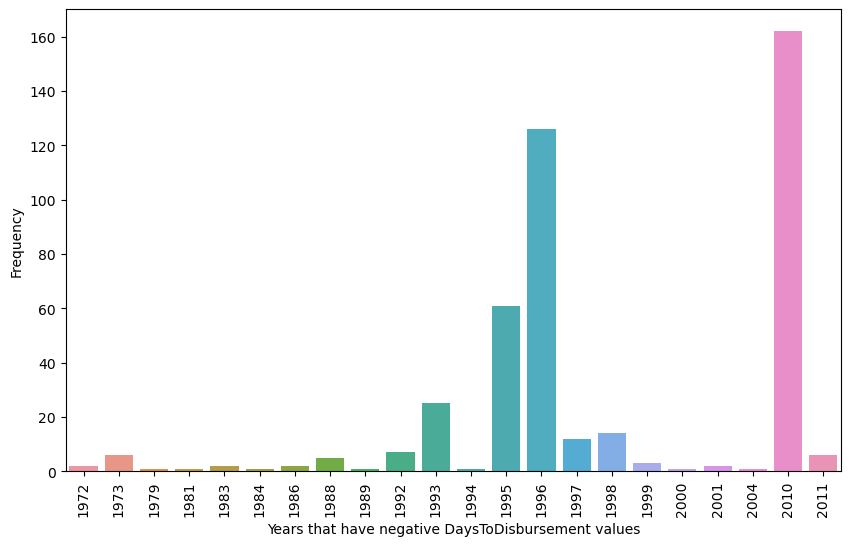

(472096, 24)


In [73]:
subset = df[df['DaysToDisbursement'] < 0]

print(subset.shape)

plt.figure(figsize = (10,6))
sns.countplot(subset['ApprovalFY'])
plt.xticks(rotation = 90)
plt.xlabel("Years that have negative DaysToDisbursement values")
plt.ylabel("Frequency")
plt.show()

# Remove records with loans disbursed prior to being approved (assumed this entry is erroneous)
df = df[df['DaysToDisbursement'] >= 0]

# Check how many records are left
print(df.shape)

In the United States, a small business is either defined by a capped revenue OR having less than 1500 employees. There are 89 rows in the data in which the number of employees is greater. We will assume this is an error, and remove those rows.

In [74]:
df = df[df['NoEmp'] <= 1500]

Now looking at the NaN values in the NAICS variable (industry classification), we see there are quite a lot of rows with an undefined industry, with the most NaNs concentrated between 1995-1998. Since I'll be using machine learning models that can handle null values, I am going to keep these values in, as other information in the entry could be useful for classification.

In [75]:
# code to remove columns containing 50% or more NaN values
perc = 50.0
min_count =  int(((100 - perc) / 100) * df.shape[0] + 1)
print(min_count)
# any column with more than 236004 missing values has over 50% nulls

df['NAICS'].isna().sum() > min_count

# there are NOT more than 50% missing values in NAICS, so again, I'll keep the NaNs for now.

236004


False

Rename some of the columns for clarification

In [76]:
df = df.rename(columns={"NAICS": "Industry",
                        "Term": "Term (Months)",
                        "NewExist" : "IsNewBusiness",
                        "CreateJob" : "JobsCreated",
                        "RetainedJob" : "JobsRetained",
                        "FranchiseCode" : "IsFranchise",
                        "NoEmp" : "NumberOfEmployees"
                       })

Sort columns by numerical and categorical

In [77]:
df = df[['ApprovalFY', 'DisbursementFY', 'Term (Months)', 'Term (Years)', 'DaysToDisbursement','NumberOfEmployees',
           'JobsCreated', 'JobsRetained', 'DisbursementGross', 'GrAppv',
           'SBA_Appv', 'Portion_SBA_Bank', # numerical
         
           'ApprovalDate', 'DisbursementDate', # datetime
         
           'State',  'Region', 'Industry',  'IsNewBusiness', 'IsFranchise', 'UrbanRural',
           'RevLineCr', 'LowDoc', 'Recession', 'Default' # categorical
          ]]

In [78]:
# write preprocessed data to new file

df.to_csv('SBA_prepro.csv')